In [1]:
from src.trainer import train
import random
import numpy as np
import gymnasium as gym
import config

In [2]:
trained_agent = train()

Ep 10 reward 28.0 MA(100) 27.20 eps 0.761 alpha 0.095
Ep 20 reward -1.0 MA(100) 24.65 eps 0.724 alpha 0.090
Ep 30 reward 2.0 MA(100) 29.80 eps 0.688 alpha 0.086
Ep 40 reward 2.0 MA(100) 26.48 eps 0.655 alpha 0.082
Ep 50 reward 79.0 MA(100) 36.44 eps 0.623 alpha 0.078
Ep 60 reward 144.0 MA(100) 51.38 eps 0.592 alpha 0.074
Ep 70 reward 107.0 MA(100) 57.06 eps 0.563 alpha 0.070
Ep 80 reward 88.0 MA(100) 63.79 eps 0.536 alpha 0.067
Ep 90 reward 80.0 MA(100) 71.41 eps 0.510 alpha 0.064
Ep 100 reward 185.0 MA(100) 77.63 eps 0.485 alpha 0.061
q_table stats: min -31.516, mean 20.105, max 115.394
Ep 110 reward 104.0 MA(100) 87.77 eps 0.461 alpha 0.058
Ep 120 reward 164.0 MA(100) 101.10 eps 0.438 alpha 0.055
Ep 130 reward 111.0 MA(100) 117.85 eps 0.417 alpha 0.052
Ep 140 reward 150.0 MA(100) 131.06 eps 0.397 alpha 0.050
Ep 150 reward 115.0 MA(100) 141.05 eps 0.377 alpha 0.047
Ep 160 reward 186.0 MA(100) 146.03 eps 0.359 alpha 0.045
Ep 170 reward 130.0 MA(100) 154.67 eps 0.341 alpha 0.043
Ep 180 

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


Ep 510 reward 278.0 MA(100) 370.45 eps 0.062 alpha 0.010
Ep 520 reward 457.0 MA(100) 378.66 eps 0.059 alpha 0.010
Ep 530 reward 480.0 MA(100) 379.21 eps 0.056 alpha 0.010
Ep 540 reward 242.0 MA(100) 389.49 eps 0.053 alpha 0.010
Ep 550 reward 480.0 MA(100) 388.28 eps 0.051 alpha 0.010
Ep 560 reward 480.0 MA(100) 392.07 eps 0.048 alpha 0.010
Ep 570 reward 480.0 MA(100) 400.03 eps 0.046 alpha 0.010
Ep 580 reward 438.0 MA(100) 404.23 eps 0.044 alpha 0.010
Ep 590 reward 219.0 MA(100) 386.18 eps 0.042 alpha 0.010
Ep 600 reward 258.0 MA(100) 375.49 eps 0.040 alpha 0.010
q_table stats: min -29.076, mean 19.806, max 124.594
Ep 610 reward 256.0 MA(100) 357.10 eps 0.038 alpha 0.010
Ep 620 reward 480.0 MA(100) 351.92 eps 0.036 alpha 0.010
Ep 630 reward 340.0 MA(100) 358.77 eps 0.034 alpha 0.010
Ep 640 reward 274.0 MA(100) 356.05 eps 0.032 alpha 0.010
Ep 650 reward 311.0 MA(100) 347.73 eps 0.031 alpha 0.010
Ep 660 reward 440.0 MA(100) 335.58 eps 0.029 alpha 0.010
Ep 670 reward 480.0 MA(100) 322.43 

In [3]:
def test(fql_agent, num_episodes=100, render=False, seed=None, max_steps=None, verbose=True):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    env = gym.make(config.ENV_NAME)
    max_steps = max_steps or getattr(config, "MAX_STEPS_PER_EPISODE", 1000)

    prev_eps = getattr(fql_agent, "epsilon", None)
    if prev_eps is not None:
        fql_agent.epsilon = 0.0

    episode_rewards = []
    try:
        for ep in range(1, num_episodes + 1):
            if seed is not None:
                obs, _ = env.reset(seed=seed + ep)
            else:
                obs, _ = env.reset()

            total_reward = 0.0
            terminated = truncated = False
            steps = 0
            cart_pos, cart_vel, pole_angle, pole_ang_vel = obs
            action = fql_agent.get_initial_action([float(pole_angle), float(pole_ang_vel)])

            while not (terminated or truncated) and steps < max_steps:
                obs, reward, terminated, truncated, _ = env.step(int(action))
                total_reward += reward
                steps += 1

                if terminated or truncated:
                    break

                _, _, pole_angle, pole_ang_vel = obs
                action = fql_agent.get_action([float(pole_angle), float(pole_ang_vel)])

            episode_rewards.append(total_reward)

            if verbose and (ep == 1 or ep % 10 == 0 or ep == num_episodes):
                recent_ma = float(np.mean(episode_rewards[-100:]))
                print(f"[Test] Ep {ep}/{num_episodes} reward {total_reward:.1f} recent_MA({min(100,len(episode_rewards))}) {recent_ma:.2f}")

    finally:
        if prev_eps is not None:
            fql_agent.epsilon = prev_eps
        env.close()

    stats = {
        "mean": float(np.mean(episode_rewards)),
        "std": float(np.std(episode_rewards)),
        "min": float(np.min(episode_rewards)),
        "max": float(np.max(episode_rewards)),
        "median": float(np.median(episode_rewards)),
    }

    if verbose:
        print("=== Evaluation summary ===")
        print(f"episodes: {len(episode_rewards)}  mean: {stats['mean']:.2f}  std: {stats['std']:.2f}  min: {stats['min']:.1f}  max: {stats['max']:.1f}")

    return episode_rewards, stats

In [4]:
test_rewards, test_stats = test(trained_agent[0], num_episodes=50, render=True, seed=42)

[Test] Ep 1/50 reward 500.0 recent_MA(1) 500.00
[Test] Ep 10/50 reward 500.0 recent_MA(10) 500.00
[Test] Ep 20/50 reward 500.0 recent_MA(20) 500.00
[Test] Ep 30/50 reward 500.0 recent_MA(30) 500.00
[Test] Ep 40/50 reward 500.0 recent_MA(40) 500.00
[Test] Ep 50/50 reward 500.0 recent_MA(50) 500.00
=== Evaluation summary ===
episodes: 50  mean: 500.00  std: 0.00  min: 500.0  max: 500.0


In [1]:
import re
import matplotlib.pyplot as plt

log_text = """Ep 10 reward 28.0 MA(100) 27.20 eps 0.761 alpha 0.095
Ep 20 reward -1.0 MA(100) 24.65 eps 0.724 alpha 0.090
Ep 30 reward 2.0 MA(100) 29.80 eps 0.688 alpha 0.086
Ep 40 reward 2.0 MA(100) 26.48 eps 0.655 alpha 0.082
Ep 50 reward 79.0 MA(100) 36.44 eps 0.623 alpha 0.078
Ep 60 reward 144.0 MA(100) 51.38 eps 0.592 alpha 0.074
Ep 70 reward 107.0 MA(100) 57.06 eps 0.563 alpha 0.070
Ep 80 reward 88.0 MA(100) 63.79 eps 0.536 alpha 0.067
Ep 90 reward 80.0 MA(100) 71.41 eps 0.510 alpha 0.064
Ep 100 reward 185.0 MA(100) 77.63 eps 0.485 alpha 0.061
q_table stats: min -31.516, mean 20.105, max 115.394
Ep 110 reward 104.0 MA(100) 87.77 eps 0.461 alpha 0.058
Ep 120 reward 164.0 MA(100) 101.10 eps 0.438 alpha 0.055
Ep 130 reward 111.0 MA(100) 117.85 eps 0.417 alpha 0.052
Ep 140 reward 150.0 MA(100) 131.06 eps 0.397 alpha 0.050
Ep 150 reward 115.0 MA(100) 141.05 eps 0.377 alpha 0.047
Ep 160 reward 186.0 MA(100) 146.03 eps 0.359 alpha 0.045
Ep 170 reward 130.0 MA(100) 154.67 eps 0.341 alpha 0.043
Ep 180 reward 257.0 MA(100) 164.46 eps 0.325 alpha 0.041
Ep 190 reward 200.0 MA(100) 176.25 eps 0.309 alpha 0.039
Ep 200 reward 480.0 MA(100) 183.25 eps 0.294 alpha 0.037
q_table stats: min -30.130, mean 24.010, max 153.523
Ep 210 reward 343.0 MA(100) 192.54 eps 0.279 alpha 0.035
Ep 220 reward 334.0 MA(100) 208.92 eps 0.266 alpha 0.033
Ep 230 reward 170.0 MA(100) 215.92 eps 0.253 alpha 0.032
Ep 240 reward 143.0 MA(100) 220.64 eps 0.240 alpha 0.030
Ep 250 reward 207.0 MA(100) 222.33 eps 0.228 alpha 0.029
Ep 260 reward 385.0 MA(100) 233.58 eps 0.217 alpha 0.027
Ep 270 reward 184.0 MA(100) 237.00 eps 0.207 alpha 0.026
Ep 280 reward 137.0 MA(100) 240.99 eps 0.197 alpha 0.025
Ep 290 reward 480.0 MA(100) 244.30 eps 0.187 alpha 0.023
Ep 300 reward 143.0 MA(100) 253.77 eps 0.178 alpha 0.022
q_table stats: min -29.297, mean 21.850, max 137.931
Ep 310 reward 480.0 MA(100) 259.10 eps 0.169 alpha 0.021
Ep 320 reward 154.0 MA(100) 252.73 eps 0.161 alpha 0.020
Ep 330 reward 155.0 MA(100) 254.25 eps 0.153 alpha 0.019
Ep 340 reward 480.0 MA(100) 269.62 eps 0.146 alpha 0.018
Ep 350 reward 215.0 MA(100) 284.84 eps 0.138 alpha 0.017
Ep 360 reward 480.0 MA(100) 288.36 eps 0.132 alpha 0.016
Ep 370 reward 211.0 MA(100) 289.77 eps 0.125 alpha 0.016
Ep 380 reward 299.0 MA(100) 289.46 eps 0.119 alpha 0.015
Ep 390 reward 143.0 MA(100) 295.34 eps 0.113 alpha 0.014
Ep 400 reward 225.0 MA(100) 289.05 eps 0.108 alpha 0.013
q_table stats: min -29.215, mean 20.151, max 126.059
Ep 410 reward 480.0 MA(100) 301.90 eps 0.102 alpha 0.013
Ep 420 reward 292.0 MA(100) 306.10 eps 0.097 alpha 0.012
Ep 430 reward 480.0 MA(100) 315.67 eps 0.093 alpha 0.012
Ep 440 reward 282.0 MA(100) 307.63 eps 0.088 alpha 0.011
Ep 450 reward 480.0 MA(100) 310.79 eps 0.084 alpha 0.010
Ep 460 reward 327.0 MA(100) 313.80 eps 0.080 alpha 0.010
Ep 470 reward 124.0 MA(100) 330.74 eps 0.076 alpha 0.010
Ep 480 reward 480.0 MA(100) 347.40 eps 0.072 alpha 0.010
Ep 490 reward 408.0 MA(100) 358.27 eps 0.069 alpha 0.010
Ep 500 reward 122.0 MA(100) 369.20 eps 0.065 alpha 0.010
q_table stats: min -29.111, mean 19.375, max 115.145
<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.
Ep 510 reward 278.0 MA(100) 370.45 eps 0.062 alpha 0.010
Ep 520 reward 457.0 MA(100) 378.66 eps 0.059 alpha 0.010
Ep 530 reward 480.0 MA(100) 379.21 eps 0.056 alpha 0.010
Ep 540 reward 242.0 MA(100) 389.49 eps 0.053 alpha 0.010
Ep 550 reward 480.0 MA(100) 388.28 eps 0.051 alpha 0.010
Ep 560 reward 480.0 MA(100) 392.07 eps 0.048 alpha 0.010
Ep 570 reward 480.0 MA(100) 400.03 eps 0.046 alpha 0.010
Ep 580 reward 438.0 MA(100) 404.23 eps 0.044 alpha 0.010
Ep 590 reward 219.0 MA(100) 386.18 eps 0.042 alpha 0.010
Ep 600 reward 258.0 MA(100) 375.49 eps 0.040 alpha 0.010
q_table stats: min -29.076, mean 19.806, max 124.594
Ep 610 reward 256.0 MA(100) 357.10 eps 0.038 alpha 0.010
Ep 620 reward 480.0 MA(100) 351.92 eps 0.036 alpha 0.010
Ep 630 reward 340.0 MA(100) 358.77 eps 0.034 alpha 0.010
Ep 640 reward 274.0 MA(100) 356.05 eps 0.032 alpha 0.010
Ep 650 reward 311.0 MA(100) 347.73 eps 0.031 alpha 0.010
Ep 660 reward 440.0 MA(100) 335.58 eps 0.029 alpha 0.010
Ep 670 reward 480.0 MA(100) 322.43 eps 0.028 alpha 0.010
Ep 680 reward 285.0 MA(100) 313.75 eps 0.026 alpha 0.010
Ep 690 reward 480.0 MA(100) 316.08 eps 0.025 alpha 0.010
Ep 700 reward 236.0 MA(100) 331.46 eps 0.024 alpha 0.010
q_table stats: min -29.068, mean 18.668, max 119.792
Ep 710 reward 259.0 MA(100) 335.59 eps 0.023 alpha 0.010
Ep 720 reward 264.0 MA(100) 329.37 eps 0.022 alpha 0.010
Ep 730 reward 480.0 MA(100) 323.49 eps 0.021 alpha 0.010
Ep 740 reward 480.0 MA(100) 321.95 eps 0.020 alpha 0.010
Ep 750 reward 480.0 MA(100) 340.33 eps 0.019 alpha 0.010
Ep 760 reward 251.0 MA(100) 356.92 eps 0.018 alpha 0.010
Ep 770 reward 266.0 MA(100) 351.02 eps 0.017 alpha 0.010
Ep 780 reward 208.0 MA(100) 343.53 eps 0.016 alpha 0.010
Ep 790 reward 339.0 MA(100) 343.10 eps 0.015 alpha 0.010
Ep 800 reward 412.0 MA(100) 342.51 eps 0.015 alpha 0.010
q_table stats: min -29.070, mean 18.284, max 110.598
Ep 810 reward 480.0 MA(100) 363.19 eps 0.014 alpha 0.010
Ep 820 reward 480.0 MA(100) 384.63 eps 0.013 alpha 0.010
Ep 830 reward 273.0 MA(100) 376.49 eps 0.012 alpha 0.010
Ep 840 reward 303.0 MA(100) 378.48 eps 0.012 alpha 0.010
Ep 850 reward 480.0 MA(100) 378.12 eps 0.011 alpha 0.010
Ep 860 reward 480.0 MA(100) 376.32 eps 0.011 alpha 0.010
Ep 870 reward 390.0 MA(100) 390.17 eps 0.010 alpha 0.010
Ep 880 reward 480.0 MA(100) 401.86 eps 0.010 alpha 0.010
Ep 890 reward 386.0 MA(100) 410.61 eps 0.010 alpha 0.010
Ep 900 reward 157.0 MA(100) 405.80 eps 0.010 alpha 0.010
q_table stats: min -29.965, mean 18.735, max 104.330
Ep 910 reward 223.0 MA(100) 393.41 eps 0.010 alpha 0.010
Ep 920 reward 169.0 MA(100) 373.86 eps 0.010 alpha 0.010
Ep 930 reward 480.0 MA(100) 378.35 eps 0.010 alpha 0.010
Ep 940 reward 120.0 MA(100) 370.98 eps 0.010 alpha 0.010
Ep 950 reward 123.0 MA(100) 356.67 eps 0.010 alpha 0.010
Ep 960 reward 150.0 MA(100) 344.11 eps 0.010 alpha 0.010
Ep 970 reward 480.0 MA(100) 340.17 eps 0.010 alpha 0.010
Ep 980 reward 480.0 MA(100) 329.95 eps 0.010 alpha 0.010
Ep 990 reward 119.0 MA(100) 323.18 eps 0.010 alpha 0.010
Ep 1000 reward 480.0 MA(100) 319.90 eps 0.010 alpha 0.010
q_table stats: min -30.163, mean 18.474, max 100.605
Ep 1010 reward 480.0 MA(100) 327.71 eps 0.010 alpha 0.010
Ep 1020 reward 152.0 MA(100) 327.13 eps 0.010 alpha 0.010
Ep 1030 reward 129.0 MA(100) 322.44 eps 0.010 alpha 0.010
Ep 1040 reward 480.0 MA(100) 327.73 eps 0.010 alpha 0.010
Ep 1050 reward 480.0 MA(100) 327.63 eps 0.010 alpha 0.010
Ep 1060 reward 137.0 MA(100) 323.09 eps 0.010 alpha 0.010
Ep 1070 reward 480.0 MA(100) 320.88 eps 0.010 alpha 0.010
Ep 1080 reward 480.0 MA(100) 335.59 eps 0.010 alpha 0.010
Ep 1090 reward 480.0 MA(100) 349.44 eps 0.010 alpha 0.010
Ep 1100 reward 480.0 MA(100) 343.30 eps 0.010 alpha 0.010
q_table stats: min -30.155, mean 18.624, max 114.646
Ep 1110 reward 162.0 MA(100) 324.53 eps 0.010 alpha 0.010
Ep 1120 reward 193.0 MA(100) 321.57 eps 0.010 alpha 0.010
Ep 1130 reward 480.0 MA(100) 330.40 eps 0.010 alpha 0.010
Ep 1140 reward 480.0 MA(100) 341.20 eps 0.010 alpha 0.010
Ep 1150 reward 480.0 MA(100) 355.40 eps 0.010 alpha 0.010
Ep 1160 reward 480.0 MA(100) 375.64 eps 0.010 alpha 0.010
Ep 1170 reward 480.0 MA(100) 387.22 eps 0.010 alpha 0.010
Ep 1180 reward 480.0 MA(100) 388.59 eps 0.010 alpha 0.010
Ep 1190 reward 480.0 MA(100) 391.82 eps 0.010 alpha 0.010
Ep 1200 reward 460.0 MA(100) 414.66 eps 0.010 alpha 0.010
q_table stats: min -29.945, mean 19.929, max 139.415
Ep 1210 reward 478.0 MA(100) 437.99 eps 0.010 alpha 0.010
Ep 1220 reward 480.0 MA(100) 461.08 eps 0.010 alpha 0.010
Ep 1230 reward 480.0 MA(100) 468.22 eps 0.010 alpha 0.010
Ep 1240 reward 480.0 MA(100) 472.58 eps 0.010 alpha 0.010
Ep 1250 reward 480.0 MA(100) 474.61 eps 0.010 alpha 0.010
Solved at episode 1251 (moving avg 475.33)"""

ep_pattern = re.compile(
    r"Ep (\d+) reward ([\-\d\.]+) MA\(100\) ([\d\.]+) eps ([\d\.]+) alpha ([\d\.]+)"
)

q_pattern = re.compile(
    r"q_table stats: min ([\-\d\.]+), mean ([\-\d\.]+), max ([\-\d\.]+)"
)

episodes, rewards, moving_avg, epsilons, alphas = [], [], [], [], []
q_min, q_mean, q_max = [], [], []

for line in log_text.splitlines():
    ep_match = ep_pattern.search(line)
    if ep_match:
        episodes.append(int(ep_match.group(1)))
        rewards.append(float(ep_match.group(2)))
        moving_avg.append(float(ep_match.group(3)))
        epsilons.append(float(ep_match.group(4)))
        alphas.append(float(ep_match.group(5)))
    else:
        q_match = q_pattern.search(line)
        if q_match:
            q_min.append(float(q_match.group(1)))
            q_mean.append(float(q_match.group(2)))
            q_max.append(float(q_match.group(3)))


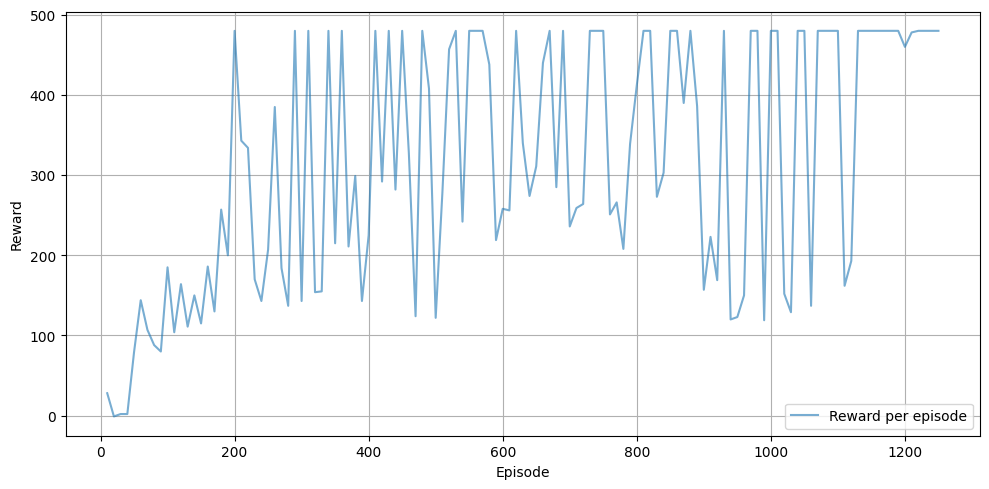

In [8]:
plt.figure(figsize=(10,5))
plt.plot(episodes, rewards, label="Reward per episode", alpha=0.6)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("reward_per_episode.png")
plt.show()

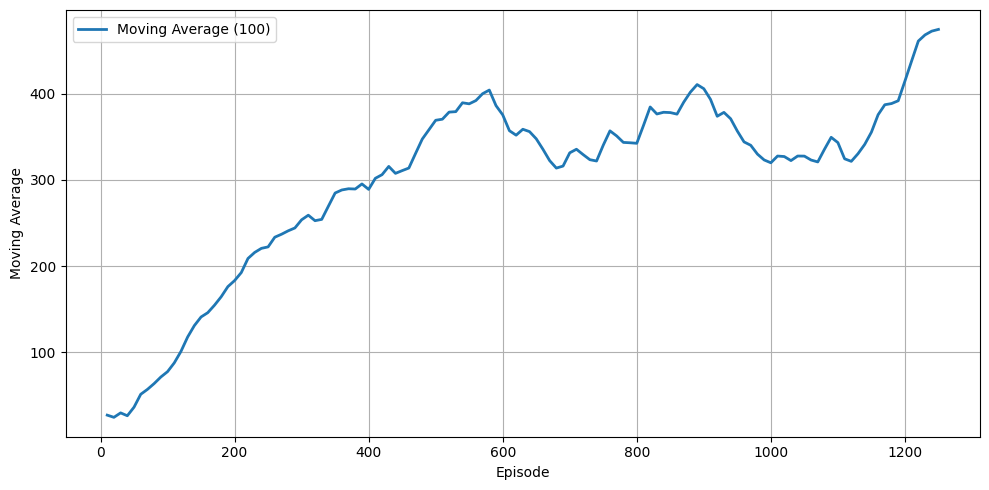

In [2]:
plt.figure(figsize=(10,5))
plt.plot(episodes, moving_avg, label="Moving Average (100)", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Moving Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("moving_avg.png")
plt.show()


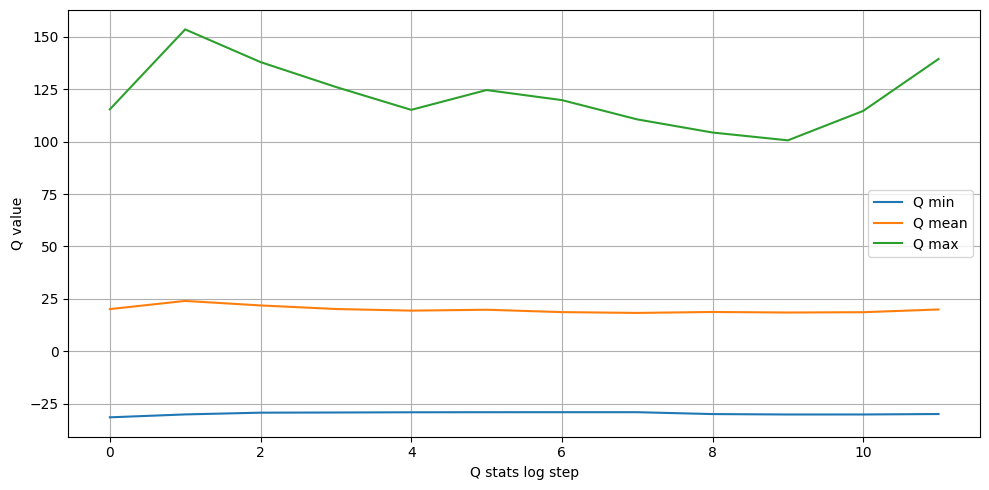

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(len(q_min)), q_min, label="Q min")
plt.plot(range(len(q_mean)), q_mean, label="Q mean")
plt.plot(range(len(q_max)), q_max, label="Q max")
plt.xlabel("Q stats log step")
plt.ylabel("Q value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("q_table_stats.png")
plt.show()

In [5]:
np.save(f"q_table_best_ep{1251}.npy", trained_agent[0].q_table)